# Group 4 - Avengers

## Feature Engineering on Restaurant Expenditure Analysis

In [1]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("C:\\Users\\satya\\Documents\\SEM 3 - SPRING 24\\CAPSTONE\\1.MidTerm\\Data Cleaning")
df =pd.read_excel('RES_dataset cleaned.xlsx')

In [3]:
df.shape

(4415, 19)

In [4]:
df.head()

,NEWID,AGE_REF,SEX,FAM_SIZE,STATE CODE,STATE NAME,No of Income Earners,Family Income after Taxes,Family Income Before Taxes,Expenditures this quarter,Food at home this quarter,Expenditure without food at home this quarter,SINGLE,MARRIED,AGE 0-25,AGE 25-50,AGE 50+,Food Away From Last Quarter (FDAWAYPQ),Fast food places during out of town(TFOODAWC)
0,5011064,87,Female,3,37,Oklahoma,1,57240.20,1979.0,10669.1001,2212.0,8457.1001,0,1,0,0,3,931.0,0
1,5011134,73,Female,2,36,Ohio,0,55570.00,48970.0,11434.2500,1690.0,9744.2500,0,2,0,0,2,0.0,0
2,5011244,47,Female,2,39,Pennsylvania,2,145387.00,172600.0,24199.7501,1300.0,22899.7501,0,2,0,2,0,1140.0,0
3,5011314,82,Female,1,20,Maine,0,248819.03,7332.0,8025.0000,910.0,7115.0000,0,1,0,0,1,780.0,0
4,5011334,87,Male,2,8,Delaware,0,50481.00,43807.0,9367.0000,1196.0,8171.0000,0,2,0,0,2,650.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415 entries, 0 to 4414
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   NEWID                                          4415 non-null   int64  
 1   AGE_REF                                        4415 non-null   int64  
 2   SEX                                            4415 non-null   object 
 3   FAM_SIZE                                       4415 non-null   int64  
 4   STATE CODE                                     4415 non-null   int64  
 5   STATE NAME                                     4415 non-null   object 
 6   No of Income Earners                           4415 non-null   int64  
 7   Family Income after Taxes                      4415 non-null   float64
 8   Family Income Before Taxes                     4415 non-null   float64
 9   Expenditures this quarter                      4415 

In [6]:
df.describe()

,NEWID,AGE_REF,FAM_SIZE,STATE CODE,No of Income Earners,Family Income after Taxes,Family Income Before Taxes,Expenditures this quarter,Food at home this quarter,Expenditure without food at home this quarter,SINGLE,MARRIED,AGE 0-25,AGE 25-50,AGE 50+,Food Away From Last Quarter (FDAWAYPQ),Fast food places during out of town(TFOODAWC)
count,4.415000e+03,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000
mean,5.165224e+06,58.951529,2.334541,28.440091,1.257305,110511.245434,86665.652775,12296.600931,1349.836315,12513.302905,0.379388,1.496036,0.658664,0.761721,0.941336,594.670669,20.888335
std,9.347813e+04,16.827597,1.411879,16.362303,0.999966,82049.269328,91052.726013,10797.733317,1007.404164,10750.837402,0.485290,0.500041,1.087329,0.863514,0.853019,735.695729,80.944087
min,5.011064e+06,29.000000,1.000000,4.000000,0.000000,17627.800000,0.000000,20.000000,166.666700,1352.666600,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.095528e+06,45.000000,1.000000,12.000000,0.000000,47651.500000,24000.000000,5020.500000,606.666700,4806.666650,0.000000,1.000000,0.000000,0.000000,0.000000,108.333300,0.000000
50%,5.207302e+06,60.000000,2.000000,28.000000,1.000000,83958.600000,59480.000000,9131.900100,1040.000000,8794.000000,0.000000,1.000000,0.000000,0.000000,1.000000,366.666700,0.000000
75%,5.255061e+06,73.000000,3.000000,42.000000,2.000000,147678.700000,120000.000000,15740.083300,1775.500000,16139.650150,1.000000,2.000000,1.000000,2.000000,2.000000,800.000000,0.000000
max,5.286191e+06,87.000000,9.000000,55.000000,6.000000,454894.700000,575058.000000,77549.000100,6240.000000,63835.666700,1.000000,2.000000,6.000000,4.000000,4.000000,5260.000000,751.000000


## Handling missing values if any

In [7]:
df.isnull().sum()   #finding missing values using isnull function

NEWID                                            0
AGE_REF                                          0
SEX                                              0
FAM_SIZE                                         0
STATE CODE                                       0
STATE NAME                                       0
No of Income Earners                             0
Family Income after Taxes                        0
Family Income Before Taxes                       0
Expenditures this quarter                        0
Food at home this quarter                        0
Expenditure without food at home this quarter    0
SINGLE                                           0
MARRIED                                          0
AGE 0-25                                         0
AGE 25-50                                        0
AGE 50+                                          0
Food Away From Last Quarter (FDAWAYPQ)           0
Fast food places during out of town(TFOODAWC)    0
dtype: int64

### Visual representation of missing values in heat map


<Axes: >

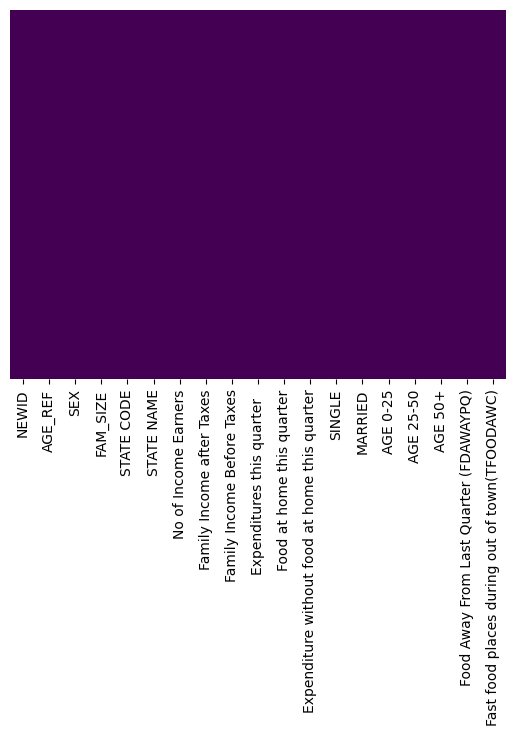

In [8]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

### Removing feature that do not contribute much

In [9]:
df.drop(["Fast food places during out of town(TFOODAWC)"], axis=1, inplace=True)


In [10]:
df.isnull().sum()

NEWID                                            0
AGE_REF                                          0
SEX                                              0
FAM_SIZE                                         0
STATE CODE                                       0
STATE NAME                                       0
No of Income Earners                             0
Family Income after Taxes                        0
Family Income Before Taxes                       0
Expenditures this quarter                        0
Food at home this quarter                        0
Expenditure without food at home this quarter    0
SINGLE                                           0
MARRIED                                          0
AGE 0-25                                         0
AGE 25-50                                        0
AGE 50+                                          0
Food Away From Last Quarter (FDAWAYPQ)           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415 entries, 0 to 4414
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   NEWID                                          4415 non-null   int64  
 1   AGE_REF                                        4415 non-null   int64  
 2   SEX                                            4415 non-null   object 
 3   FAM_SIZE                                       4415 non-null   int64  
 4   STATE CODE                                     4415 non-null   int64  
 5   STATE NAME                                     4415 non-null   object 
 6   No of Income Earners                           4415 non-null   int64  
 7   Family Income after Taxes                      4415 non-null   float64
 8   Family Income Before Taxes                     4415 non-null   float64
 9   Expenditures this quarter                      4415 

# Duplicates

In [13]:
duplicates = df.duplicated()                                  #finding duplicate values using duplicated function
print("total duplicates in the dataset",duplicates.sum())

total duplicates in the dataset 0


# Outliers

In [14]:
# Function to find outliers using IQR method
def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers.tolist()

# Find outliers for numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
outliers = {}
for column in numerical_columns:
    column_outliers = find_outliers(column)
    if column_outliers:
        outliers[column] = column_outliers

# Print outliers found in numerical columns
#for column, values in outliers.items():
#    print(f"Outliers in column '{column}': {values}")

In [15]:
# Function to find outliers using IQR method and calculate percentage
def find_outliers_and_percentage(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    percentage = round(len(outliers) / len(df) * 100,2)
    return outliers.tolist(), percentage

# Finding outliers and percentage for numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
outliers_percentage = {}
for column in numerical_columns:
    column_outliers, percentage = find_outliers_and_percentage(column)
    if column_outliers:
        outliers_percentage[column] = (column_outliers, percentage)

# Print outliers and percentage found in numerical columns
#for column, (values, percentage) in outliers_percentage.items():
 #   print(f"{column} {percentage}%")

# Feature Engineering

## Assigning U.S. States to Geographic Regions Using Binning Techniques

In [16]:
# sorting the regions with their corresponding states
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'NewHampshire', 'RhodeIsland', 'Vermont', 'NewJersey', 
                  'NewYork', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 
                'Nebraska', 'NorthDakota', 'SouthDakota'],
    'Southeast': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'NorthCarolina', 'SouthCarolina', 'Virginia', 
                  'District of Columbia', 'WestVirginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 
                  'Louisiana', 'Oklahoma', 'Texas'],
    'Southwest': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'NewMexico', 'Utah', 'Wyoming'],
    'West': ['Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

# function to map each state to its region
def map_state_to_region(state):
    for region, states in regions.items():
        if state in states:
            return region


# Creating the column Region to the dataset
df['Region'] = df['STATE NAME'].apply(map_state_to_region)

In [17]:
df.head()

,NEWID,AGE_REF,SEX,FAM_SIZE,STATE CODE,STATE NAME,No of Income Earners,Family Income after Taxes,Family Income Before Taxes,Expenditures this quarter,Food at home this quarter,Expenditure without food at home this quarter,SINGLE,MARRIED,AGE 0-25,AGE 25-50,AGE 50+,Food Away From Last Quarter (FDAWAYPQ),Region
0,5011064,87,Female,3,37,Oklahoma,1,57240.20,1979.0,10669.1001,2212.0,8457.1001,0,1,0,0,3,931.0,Southeast
1,5011134,73,Female,2,36,Ohio,0,55570.00,48970.0,11434.2500,1690.0,9744.2500,0,2,0,0,2,0.0,Midwest
2,5011244,47,Female,2,39,Pennsylvania,2,145387.00,172600.0,24199.7501,1300.0,22899.7501,0,2,0,2,0,1140.0,Northeast
3,5011314,82,Female,1,20,Maine,0,248819.03,7332.0,8025.0000,910.0,7115.0000,0,1,0,0,1,780.0,Northeast
4,5011334,87,Male,2,8,Delaware,0,50481.00,43807.0,9367.0000,1196.0,8171.0000,0,2,0,0,2,650.0,Southeast


In [18]:
df.to_excel("C:\\Users\\satya\\Documents\\SEM 3 - SPRING 24\\CAPSTONE\\1.MidTerm\\Data Cleaning\\New Updated Feature Engineeting Dataset.xlsx", index=False) 

## Categorizing Expenditure Levels Using Quartile-Based Binning

In [19]:
# Categorizing Amount spend outside into High, Medium and low 

# Determine the thresholds for high, medium, and low expenditures using quartiles
q1 = df['Expenditure without food at home this quarter'].quantile(0.25)
q3 = df['Expenditure without food at home this quarter'].quantile(0.75)


# Define a function to categorize each expenditure
def categorize_expenditure(amount):
    if amount > q3:
        return 'High'
    elif amount < q1:
        return 'Low'
    else:
        return 'Medium'

# Apply the categorization function to the 'Expenditure without food at home this quarter' column
df['Expenditures Category'] = df['Expenditure without food at home this quarter'].apply(categorize_expenditure)

df['Expenditures Category']

0       Medium
1       Medium
2         High
3       Medium
4       Medium
         ...  
4410       Low
4411       Low
4412    Medium
4413    Medium
4414    Medium
Name: Expenditures Category, Length: 4415, dtype: object

In [20]:
df.to_excel("C:\\Users\\satya\\Documents\\SEM 3 - SPRING 24\\CAPSTONE\\1.MidTerm\\Data Cleaning\\New Updated Feature Engineeting Dataset.xlsx", index=False) 

## Applying Categorical Encoding to Gender

In [21]:
df['SEX_CATEGORICAL'] = df['SEX'].map({'Male': 1, 'Female': 2})

In [22]:
df.head()

,NEWID,AGE_REF,SEX,FAM_SIZE,STATE CODE,STATE NAME,No of Income Earners,Family Income after Taxes,Family Income Before Taxes,Expenditures this quarter,...,Expenditure without food at home this quarter,SINGLE,MARRIED,AGE 0-25,AGE 25-50,AGE 50+,Food Away From Last Quarter (FDAWAYPQ),Region,Expenditures Category,SEX_CATEGORICAL
0,5011064,87,Female,3,37,Oklahoma,1,57240.20,1979.0,10669.1001,...,8457.1001,0,1,0,0,3,931.0,Southeast,Medium,2
1,5011134,73,Female,2,36,Ohio,0,55570.00,48970.0,11434.2500,...,9744.2500,0,2,0,0,2,0.0,Midwest,Medium,2
2,5011244,47,Female,2,39,Pennsylvania,2,145387.00,172600.0,24199.7501,...,22899.7501,0,2,0,2,0,1140.0,Northeast,High,2
3,5011314,82,Female,1,20,Maine,0,248819.03,7332.0,8025.0000,...,7115.0000,0,1,0,0,1,780.0,Northeast,Medium,2
4,5011334,87,Male,2,8,Delaware,0,50481.00,43807.0,9367.0000,...,8171.0000,0,2,0,0,2,650.0,Southeast,Medium,1


In [23]:
df.to_excel("C:\\Users\\satya\\Documents\\SEM 3 - SPRING 24\\CAPSTONE\\1.MidTerm\\Data Cleaning\\New Updated Feature Engineeting Dataset.xlsx", index=False)

# Data Distributions and Visualizations

## Correlation Matrix for Numerical Variables

In [24]:
corr_matrix = df.corr()                       # creating correlation matrix using function corr()
corr_matrix

,NEWID,AGE_REF,FAM_SIZE,STATE CODE,No of Income Earners,Family Income after Taxes,Family Income Before Taxes,Expenditures this quarter,Food at home this quarter,Expenditure without food at home this quarter,SINGLE,MARRIED,AGE 0-25,AGE 25-50,AGE 50+,Food Away From Last Quarter (FDAWAYPQ),SEX_CATEGORICAL
NEWID,1.000000,-0.017833,-0.003527,0.011511,0.008215,-0.001257,-0.020519,-0.038002,-0.039997,-0.002896,0.015576,-0.011499,0.006869,-0.002828,-0.008133,-0.035751,0.018842
AGE_REF,-0.017833,1.000000,-0.363606,-0.004556,-0.386794,-0.111508,-0.244260,-0.158979,-0.117261,-0.073292,0.000754,-0.166629,-0.329407,-0.588578,0.401871,-0.164063,0.042163
FAM_SIZE,-0.003527,-0.363606,1.000000,0.003452,0.606879,0.178202,0.275725,0.241794,0.311864,0.102757,-0.356559,0.486592,0.834552,0.599826,-0.010036,0.196026,-0.014555
STATE CODE,0.011511,-0.004556,0.003452,1.000000,-0.012419,-0.031276,-0.023873,-0.041823,-0.043055,-0.043269,-0.011788,0.014155,0.024044,-0.006591,-0.020095,-0.060167,-0.014635
No of Income Earners,0.008215,-0.386794,0.606879,-0.012419,1.000000,0.249934,0.403365,0.302462,0.216969,0.151610,-0.177865,0.345929,0.428345,0.557452,-0.086149,0.254206,-0.050870
Family Income after Taxes,-0.001257,-0.111508,0.178202,-0.031276,0.249934,1.000000,0.553609,0.330189,0.151478,0.332136,-0.152943,0.206472,0.097425,0.149743,0.028390,0.260663,-0.068996
Family Income Before Taxes,-0.020519,-0.244260,0.275725,-0.023873,0.403365,0.553609,1.000000,0.486146,0.177824,0.351171,-0.221060,0.338827,0.145174,0.268265,0.012173,0.389682,-0.108186
Expenditures this quarter,-0.038002,-0.158979,0.241794,-0.041823,0.302462,0.330189,0.486146,1.000000,0.432256,0.759968,-0.206020,0.283803,0.136655,0.178144,0.053427,0.550620,-0.053691
Food at home this quarter,-0.039997,-0.117261,0.311864,-0.043055,0.216969,0.151478,0.177824,0.432256,1.000000,0.403404,-0.152459,0.194701,0.246025,0.170509,0.033862,0.311304,-0.017444
Expenditure without food at home this quarter,-0.002896,-0.073292,0.102757,-0.043269,0.151610,0.332136,0.351171,0.759968,0.403404,1.000000,-0.123386,0.145762,0.050606,0.076240,0.030252,0.408022,-0.041230


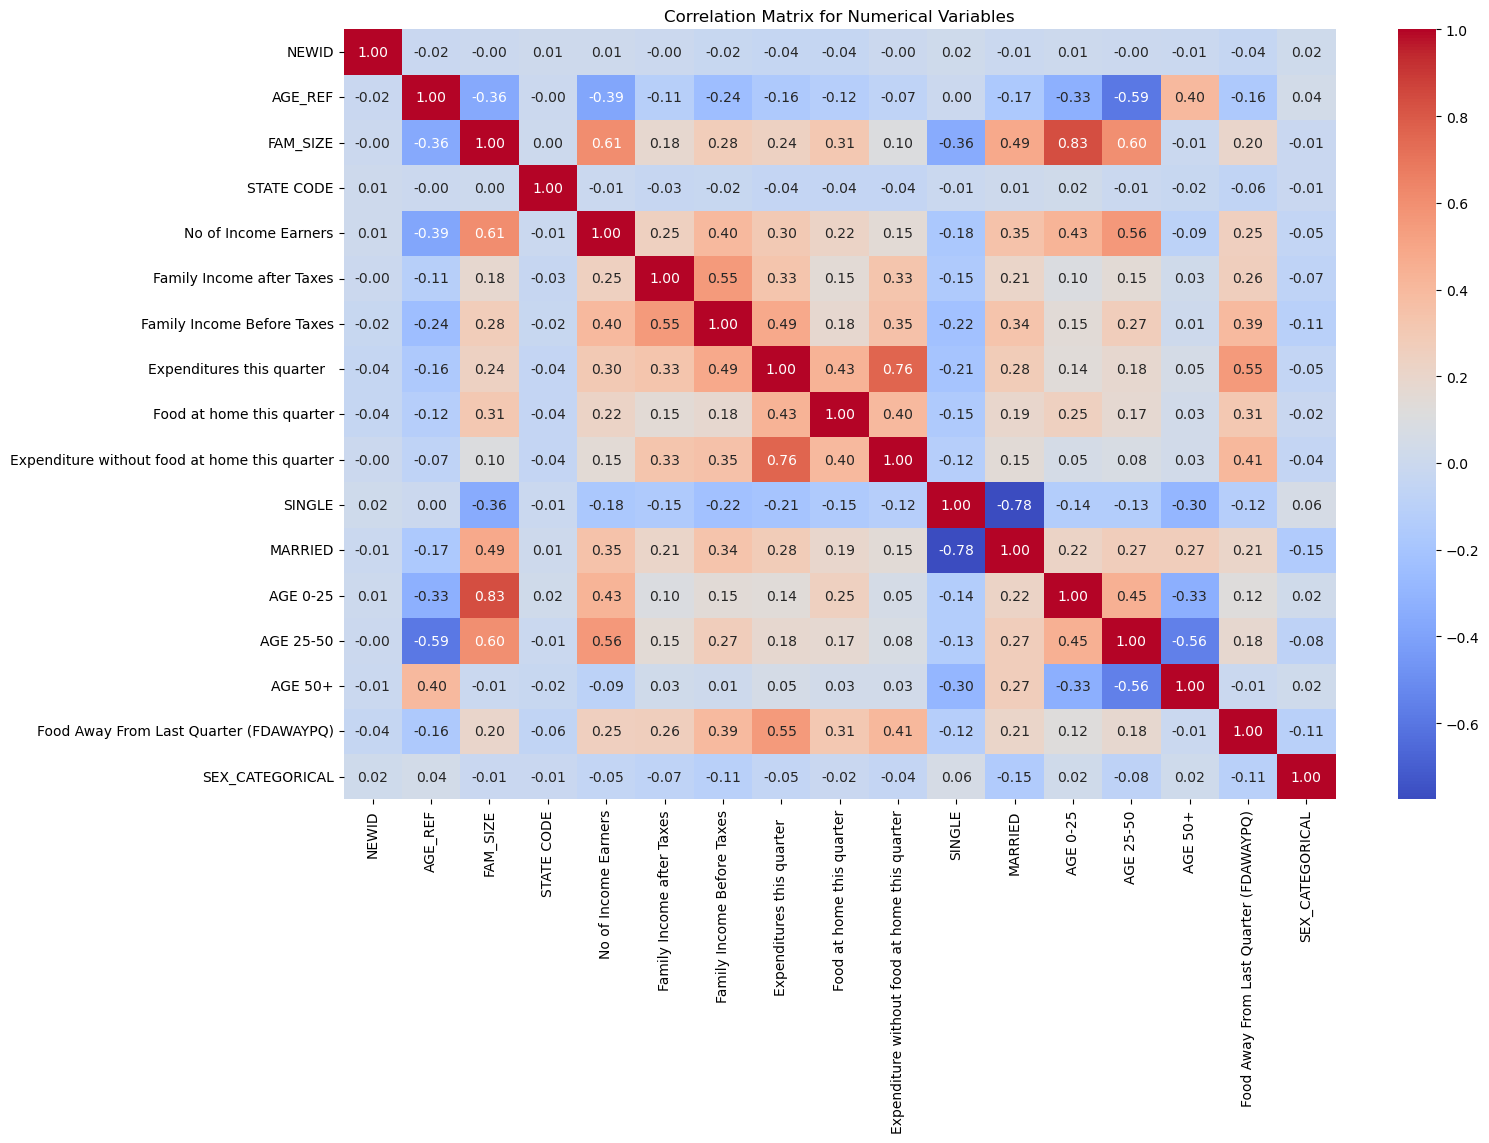

In [25]:
# Selecting numeric variables
numeric_df = df.select_dtypes(include=['int64', 'float64'])

#orrelation matrix 
numeric_correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

## Correlation Matrix with Dependent Variable - Food Away From Last Quarter (FDAWAYPQ)

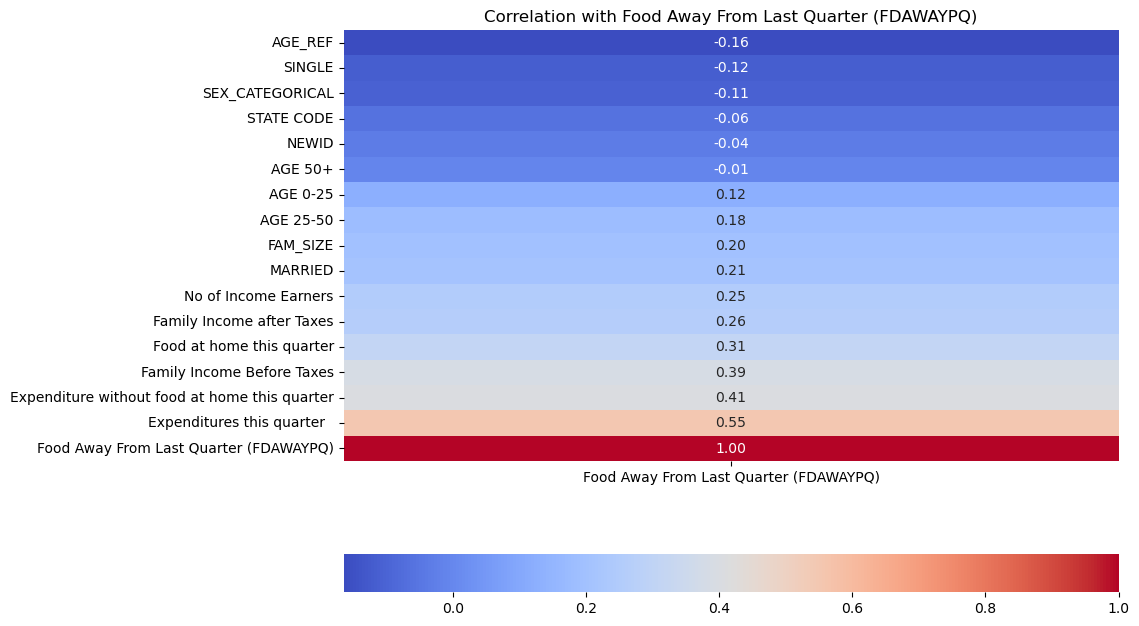

In [26]:
# correlations with 'Food Away From Last Quarter (FDAWAYPQ) - dependent variable
fdawaypq_correlation = numeric_df.corr()['Food Away From Last Quarter (FDAWAYPQ)'].sort_values()

# Convert series to DataFrame for heatmap visuals
fdawaypq_correlation_df = fdawaypq_correlation.to_frame()  # Converting to DataFrame for heatmap

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(fdawaypq_correlation_df, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'orientation': 'horizontal'})
plt.title('Correlation with Food Away From Last Quarter (FDAWAYPQ)')
plt.show()

### Histograms

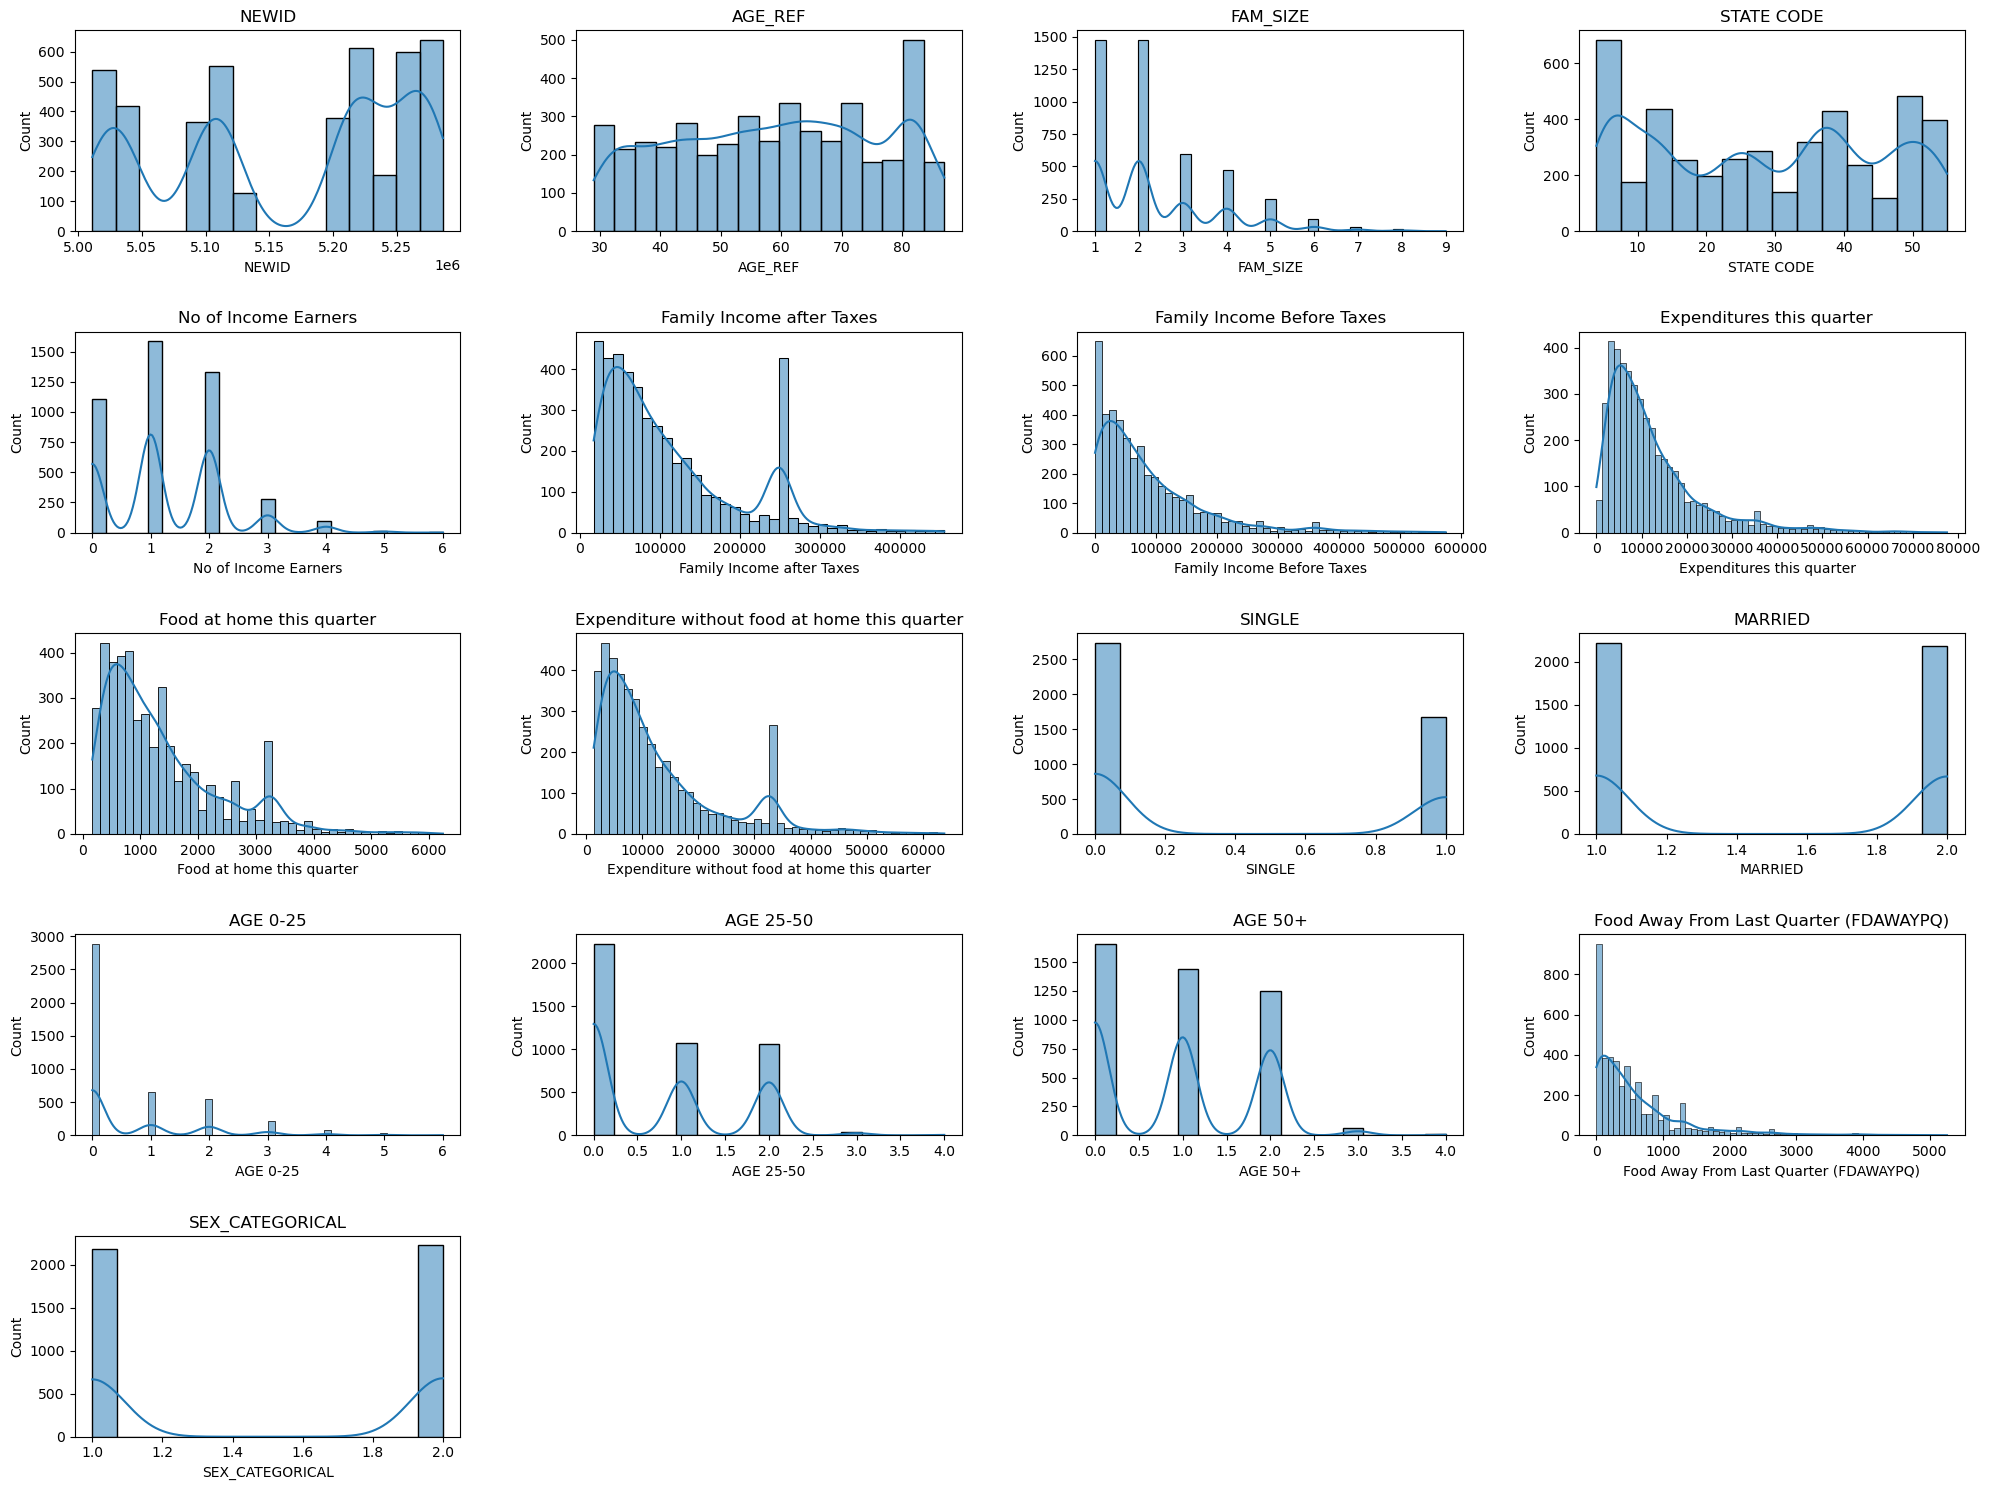

In [27]:
#plotting histograms for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#loop for plotting all the numerical histogram in the dataframe
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()

# Adjusting layout to prevent overlap
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


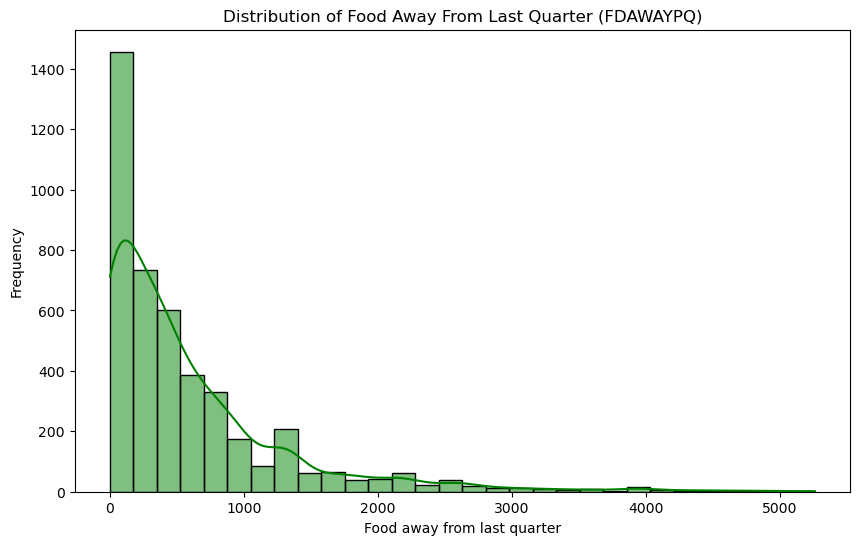

In [28]:
# Visualizing the distribution of "Food Away From Last Quarter (FDAWAYPQ)"
plt.figure(figsize=(10, 6))
sns.histplot(df['Food Away From Last Quarter (FDAWAYPQ)'], kde=True, bins=30, color='green')
plt.title('Distribution of Food Away From Last Quarter (FDAWAYPQ)')
plt.xlabel('Food away from last quarter')
plt.ylabel('Frequency')
plt.show()
    

### Box Plots

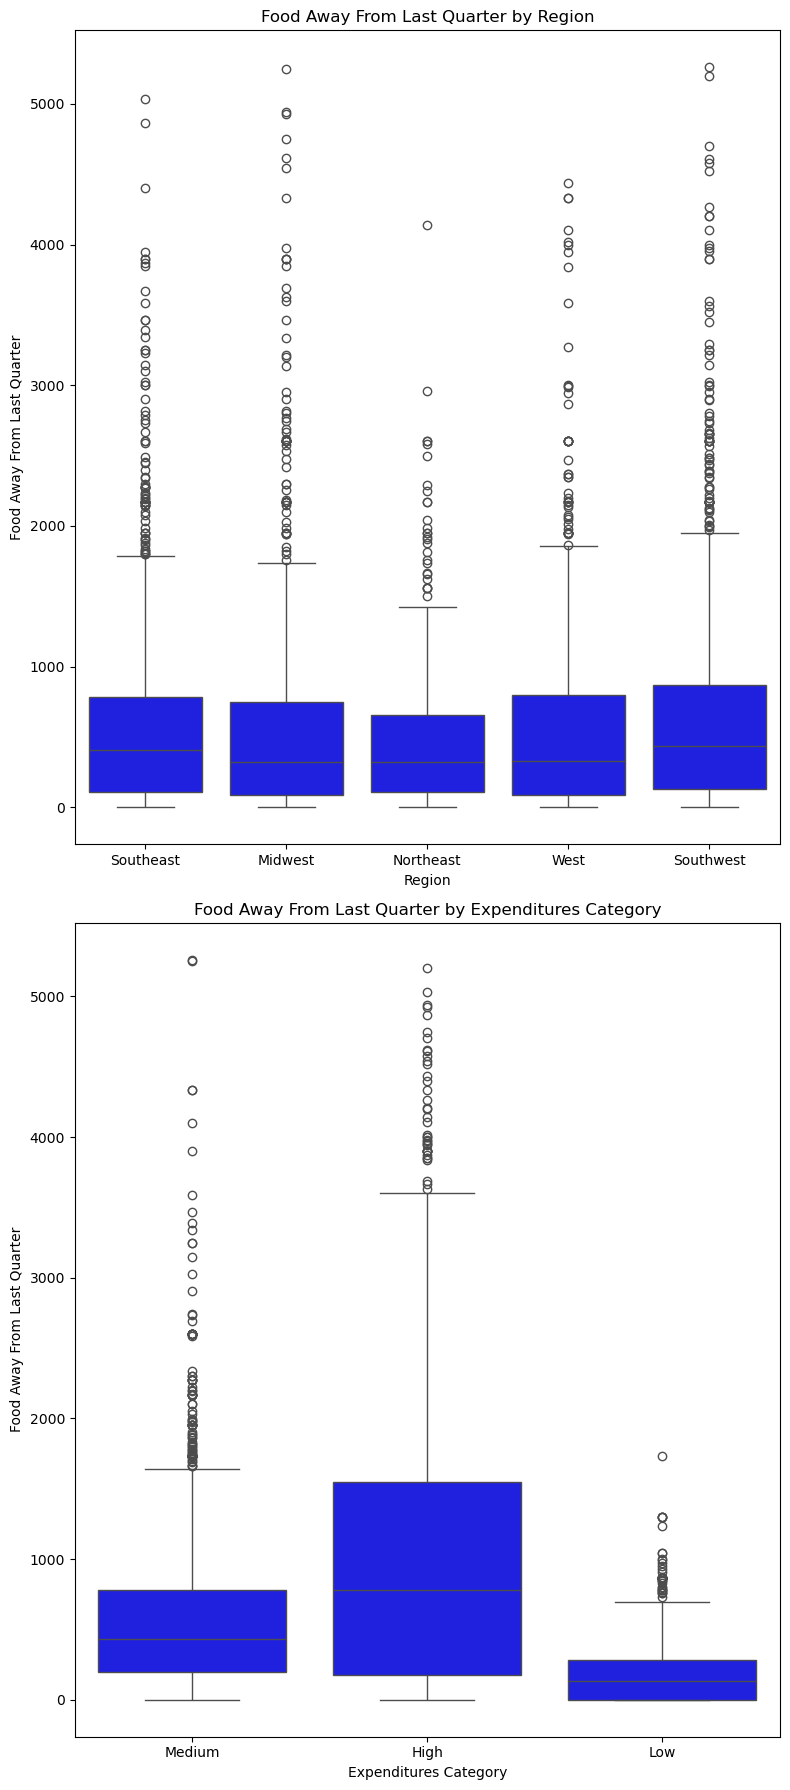

In [29]:

key_categorical_features = ['Region', 'Expenditures Category']  # categorical features in dataset

plt.figure(figsize=(8, 18)) 

for i, feature in enumerate(key_categorical_features, 1):
    plt.subplot(len(key_categorical_features), 1, i)  # Changing the subplot layout
    sns.boxplot(x=df[feature], y=df['Food Away From Last Quarter (FDAWAYPQ)'], color='blue')
    plt.title(f'Food Away From Last Quarter by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Food Away From Last Quarter')

plt.tight_layout()
plt.show()


### Bar Charts

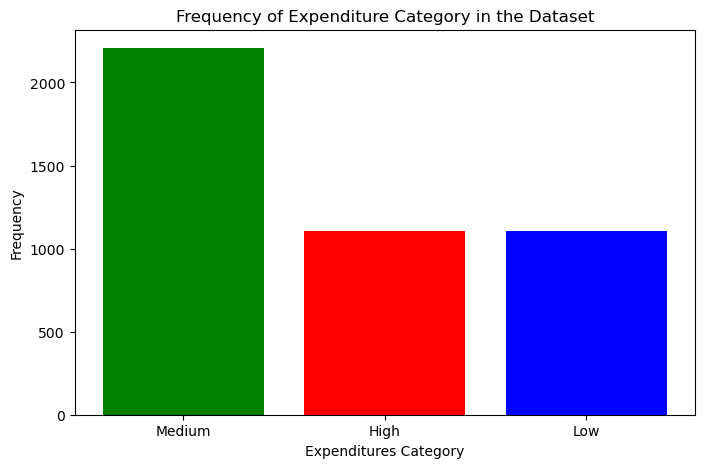

In [30]:
# Calculating the frequency of each Expenditure Category
expenditure_frequency = df['Expenditures Category'].value_counts().reset_index()

# Renaming the column
expenditure_frequency.columns = ['Expenditures Category', 'Frequency']

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(expenditure_frequency['Expenditures Category'], expenditure_frequency['Frequency'], color=['green', 'red', 'blue'])
plt.title('Frequency of Expenditure Category in the Dataset')
plt.xlabel('Expenditures Category')
plt.ylabel('Frequency')
plt.show()


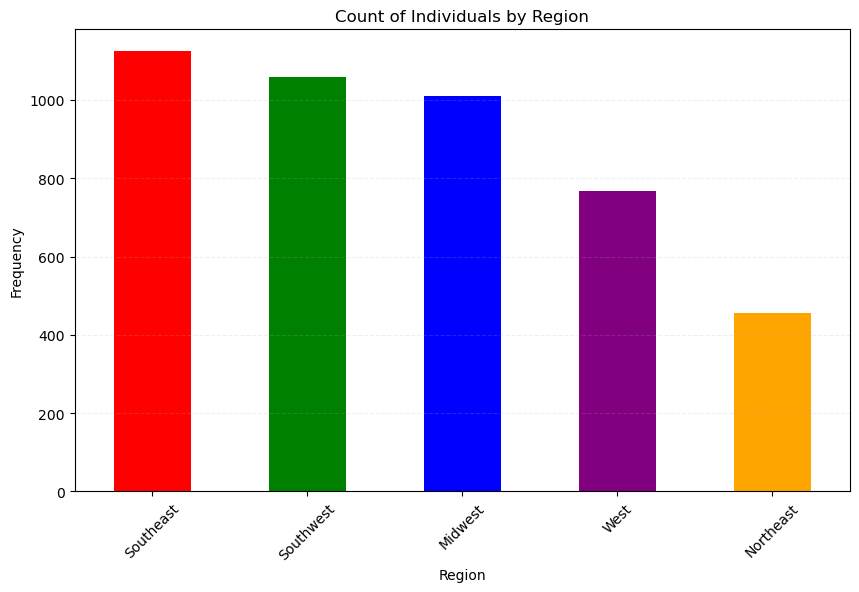

In [31]:
region_count = df['Region'].value_counts()

# Assigning unique colors for each region
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# plotting the bar plot with different colors for each bar
plt.figure(figsize=(10, 6))
region_count.plot(kind='bar', color=colors[:len(region_count)])
plt.title('Count of Individuals by Region')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()


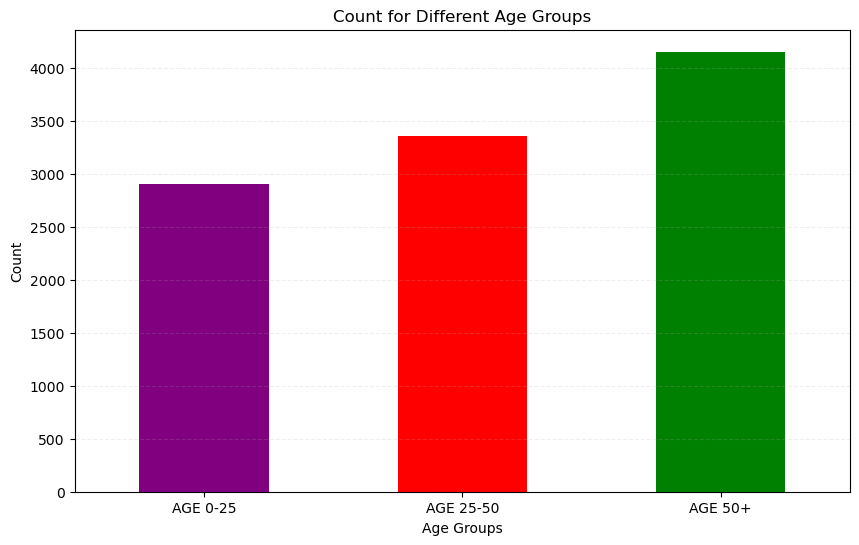

In [32]:
# bar chart for age group counts
#divided age group into 3 categories
age_group_counts = df[['AGE 0-25', 'AGE 25-50', 'AGE 50+']].sum()

# Plotting the counts for different age groups with different colors
plt.figure(figsize=[10,6])
age_group_counts.plot(kind='bar', color=['purple', 'red', 'green'])
plt.title('Count for Different Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate labels 
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()
        

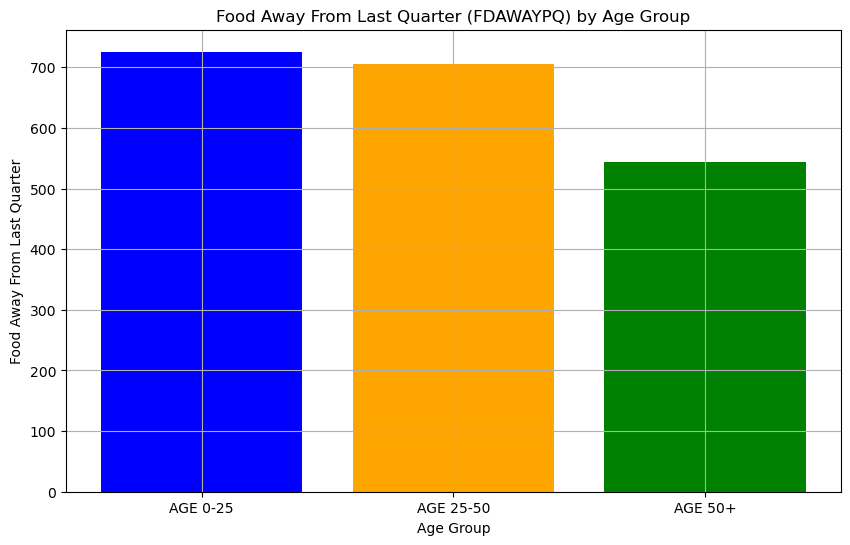

In [33]:
# Bar chart between age group and food away from last quarter

# Extract required columns
age_categories = ['AGE 0-25', 'AGE 25-50', 'AGE 50+']
fdaway_categories = df['Food Away From Last Quarter (FDAWAYPQ)']

# Calculating average food away expenditure for each age category
avg_fdaway_per_age = []
for age_cat in age_categories:
    avg_fdaway = df[df[age_cat] > 0]['Food Away From Last Quarter (FDAWAYPQ)'].mean()
    avg_fdaway_per_age.append(avg_fdaway)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(age_categories, avg_fdaway_per_age, color=['blue', 'orange', 'green'])
plt.title('Food Away From Last Quarter (FDAWAYPQ) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Food Away From Last Quarter')
plt.grid(True)
plt.show()


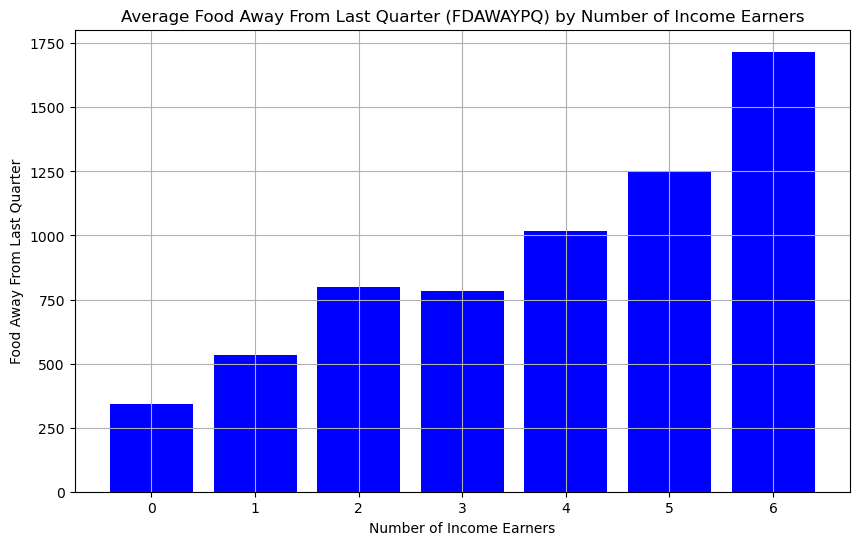

In [34]:
# Calculate average food away expenditure for each number of income earners with bar chart

income_earners_categories = df['No of Income Earners'].unique()
income_earners_categories.sort()  # Sort the categories 

avg_fdaway_per_income_earners = []
for earners in income_earners_categories:
    avg_fdaway = df[df['No of Income Earners'] == earners]['Food Away From Last Quarter (FDAWAYPQ)'].mean()
    avg_fdaway_per_income_earners.append(avg_fdaway)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(income_earners_categories.astype(str), avg_fdaway_per_income_earners, color='blue')
plt.title('Average Food Away From Last Quarter (FDAWAYPQ) by Number of Income Earners')
plt.xlabel('Number of Income Earners')
plt.ylabel('Food Away From Last Quarter')
plt.grid(True)
plt.show()


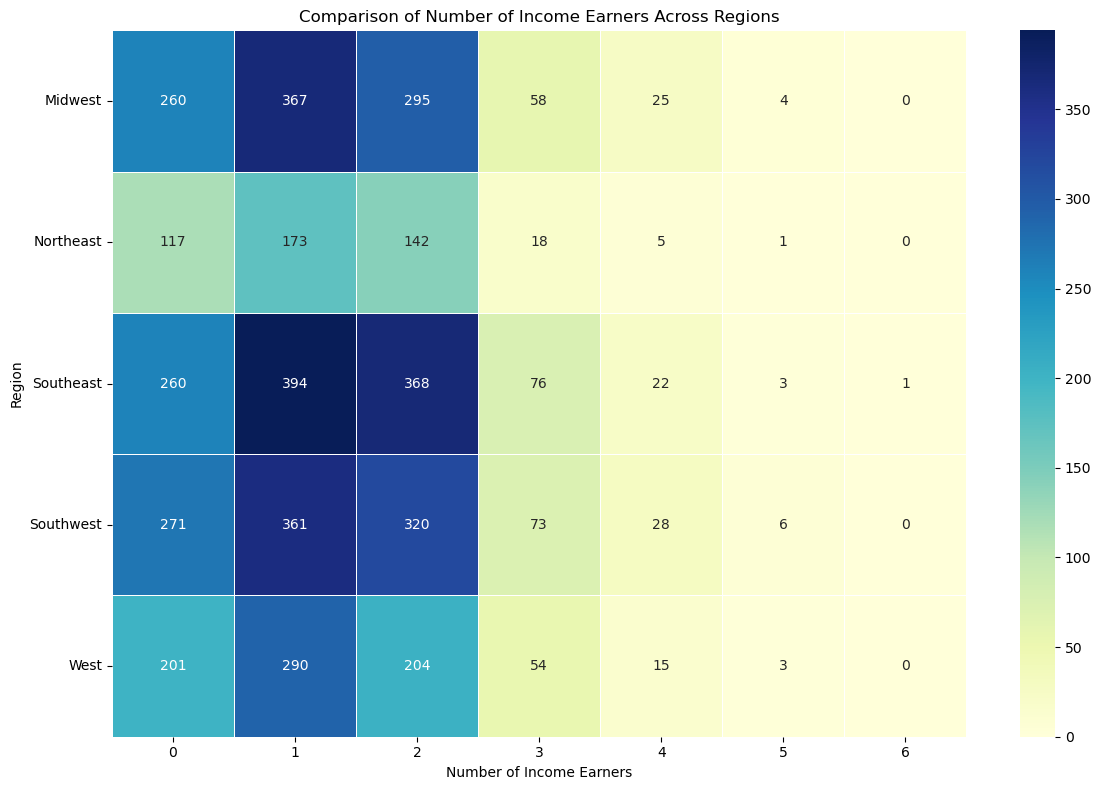

In [35]:
#  comparison of number of income earners with regions

income_earners_region_comparison = df.groupby(['Region', 'No of Income Earners'])['NEWID'].count().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(income_earners_region_comparison, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Comparison of Number of Income Earners Across Regions')
plt.xlabel('Number of Income Earners')
plt.ylabel('Region')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


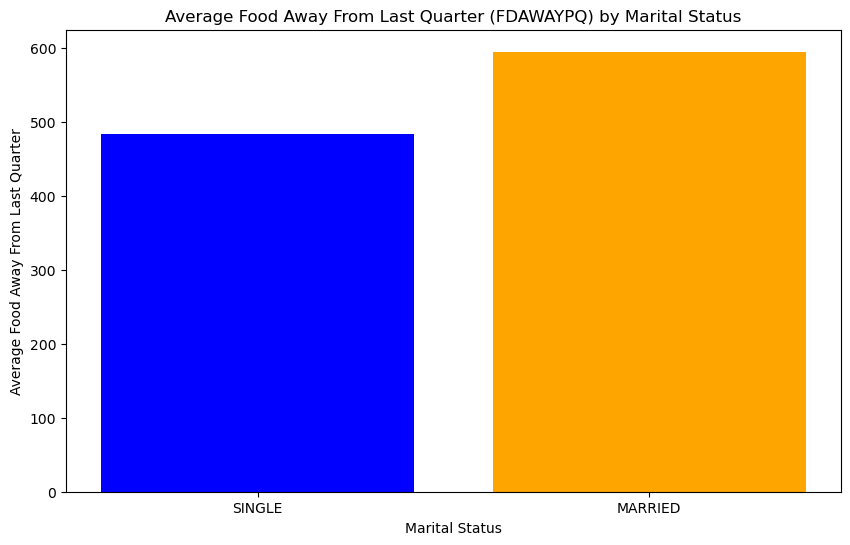

In [36]:
# Calculate average food away expenditure for Married and Single categories

marital_status_categories = ['SINGLE', 'MARRIED']
avg_fdaway_per_marital_status = []
for status in marital_status_categories:
    avg_fdaway = df[df[status] > 0]['Food Away From Last Quarter (FDAWAYPQ)'].mean()
    avg_fdaway_per_marital_status.append(avg_fdaway)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(marital_status_categories, avg_fdaway_per_marital_status, color=['blue', 'Orange'])
plt.title('Average Food Away From Last Quarter (FDAWAYPQ) by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Food Away From Last Quarter')
plt.show()


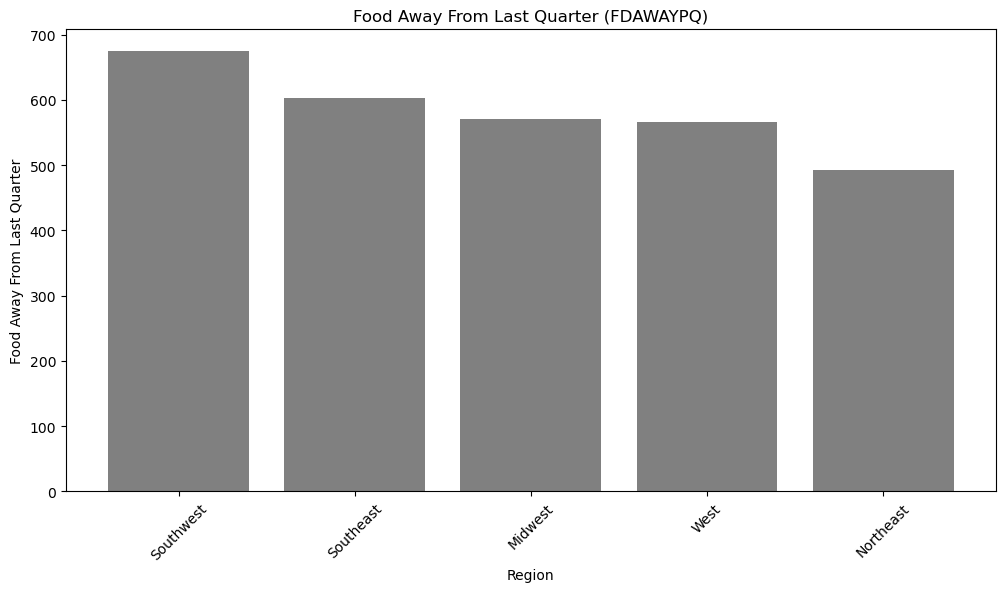

In [67]:
# Calculating average food away expenditure for each region
region_categories = df['Region'].unique()
avg_fdaway_per_region = []
for region in region_categories:
    avg_fdaway = df[df['Region'] == region]['Food Away From Last Quarter (FDAWAYPQ)'].mean()
    avg_fdaway_per_region.append(avg_fdaway)

# Sort data for better visualization
regions_sorted = [x for _, x in sorted(zip(avg_fdaway_per_region, region_categories), reverse=True)]
avg_fdaway_sorted = sorted(avg_fdaway_per_region, reverse=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(regions_sorted, avg_fdaway_sorted, color='grey')
plt.title('Food Away From Last Quarter (FDAWAYPQ)')
plt.xlabel('Region')
plt.ylabel('Food Away From Last Quarter')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.show()


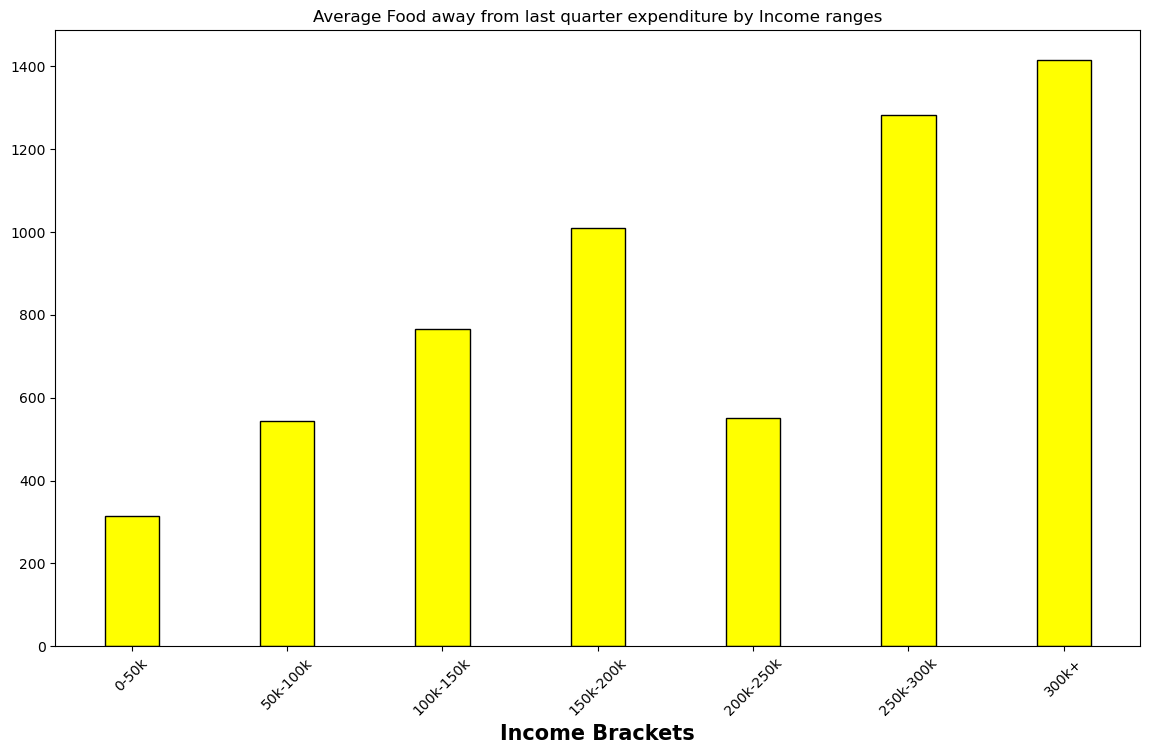

In [65]:
# First, we define income brackets. 
# Adjust the range and bins according to the distribution of the 'Family Income after Taxes' variable.

income_brackets = pd.cut(df['Family Income after Taxes'], bins=[0, 50000, 100000, 150000, 200000, 250000, 300000, np.inf], 
                         labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k+'])

# Grouping by the income brackets and calculate the mean for the two dependent variables
df['Income Brackets'] = income_brackets

# Grouped by the income brackets and calculating the mean for the dependent variable
grouped_data = df.groupby('Income Brackets')['Food Away From Last Quarter (FDAWAYPQ)'].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.35

# Plot
ax.bar(grouped_data['Income Brackets'], grouped_data['Food Away From Last Quarter (FDAWAYPQ)'], color='yellow', width=bar_width, edgecolor='black')

# Add xticks on the middle of the group bars
plt.xlabel('Income Brackets', fontweight='bold', fontsize=15)
plt.xticks(rotation=45)  # Rotates labels to improve readability

# showing graph
plt.title('Average Food away from last quarter expenditure by Income ranges')
plt.show()

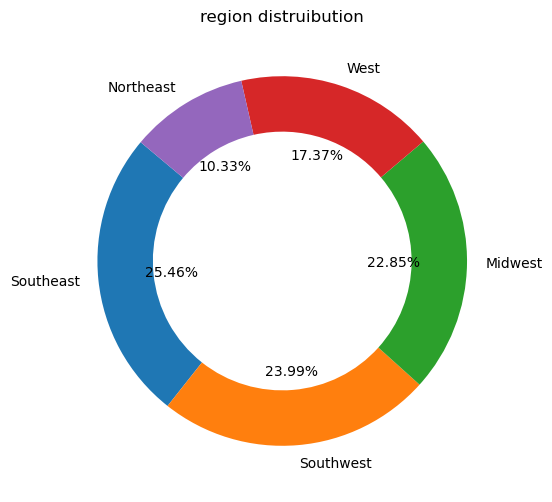

In [55]:
#Region dsitribution with reference to person

region_dist = df['Region'].value_counts()

plt.figure(figsize=(12, 6))
plt.pie(region_dist, labels = region_dist.index, autopct='%1.2f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Region Distruibution by reference of person')
plt.show()

In [38]:
df1 = df.copy()

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415 entries, 0 to 4414
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   NEWID                                          4415 non-null   int64  
 1   AGE_REF                                        4415 non-null   int64  
 2   SEX                                            4415 non-null   object 
 3   FAM_SIZE                                       4415 non-null   int64  
 4   STATE CODE                                     4415 non-null   int64  
 5   STATE NAME                                     4415 non-null   object 
 6   No of Income Earners                           4415 non-null   int64  
 7   Family Income after Taxes                      4415 non-null   float64
 8   Family Income Before Taxes                     4415 non-null   float64
 9   Expenditures this quarter                      4415 

In [40]:
df1.drop("STATE NAME", axis=1, inplace=True)

## Creating One Hot Encoding Variables

In [41]:
df1 = pd.get_dummies(df1)

In [42]:
df1.head()

,NEWID,AGE_REF,FAM_SIZE,STATE CODE,No of Income Earners,Family Income after Taxes,Family Income Before Taxes,Expenditures this quarter,Food at home this quarter,Expenditure without food at home this quarter,...,SEX_Female,SEX_Male,Region_Midwest,Region_Northeast,Region_Southeast,Region_Southwest,Region_West,Expenditures Category_High,Expenditures Category_Low,Expenditures Category_Medium
0,5011064,87,3,37,1,57240.20,1979.0,10669.1001,2212.0,8457.1001,...,1,0,0,0,1,0,0,0,0,1
1,5011134,73,2,36,0,55570.00,48970.0,11434.2500,1690.0,9744.2500,...,1,0,1,0,0,0,0,0,0,1
2,5011244,47,2,39,2,145387.00,172600.0,24199.7501,1300.0,22899.7501,...,1,0,0,1,0,0,0,1,0,0
3,5011314,82,1,20,0,248819.03,7332.0,8025.0000,910.0,7115.0000,...,1,0,0,1,0,0,0,0,0,1
4,5011334,87,2,8,0,50481.00,43807.0,9367.0000,1196.0,8171.0000,...,0,1,0,0,1,0,0,0,0,1


## Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Selecting numerical features for scaling
features_to_scale = df.select_dtypes(include=[int, float]).columns.tolist()
features_to_scale.remove('Food Away From Last Quarter (FDAWAYPQ)')  # Exclude the dependent variable


# Standardizing the dataset (mean=0, std=1)
scaler_standard = StandardScaler()
df_scaled_standard = df.copy()
df_scaled_standard[features_to_scale] = scaler_standard.fit_transform(df[features_to_scale])

# Normalizing the dataset (range [0, 1])
scaler_minmax = MinMaxScaler()
df_scaled_minmax = df.copy()
df_scaled_minmax[features_to_scale] = scaler_minmax.fit_transform(df[features_to_scale])

